### 이상치
- 상식적인 범위를 벗어나는 데이터 값을 뜻하고
- 이상치는 통계적인 방법과 도메인 지식을 이용해서 판단한다.

In [1]:
import pandas as pd

In [2]:
mpg =pd.read_csv('mpg.csv')

#### 이상치를 제거할 때 가장 많이 사용하는 시각화 그래프
- boxplot (상자그림)

In [3]:
import seaborn as sns

<AxesSubplot:ylabel='hwy'>

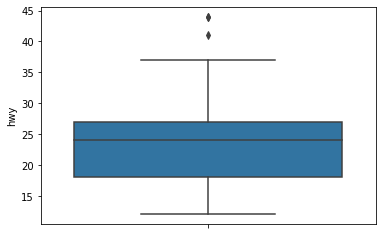

In [4]:
sns.boxplot(data=mpg, y ='hwy')

- 상자 아래 세로선 , 아랫수염 , 하위0%~25% 내에 해당하는 값

- 상자 밑면 1사분위수(Q1), 하위 25% 위치 값

- 상자내 굵은 선 2사분위수(Q2), 하위 50% 위치 값( 중앙 값)

- 상자 윗면, 3사분위수(Q3), 하위 75%위치 값

- 상자 위 세로선, 윗수염, 하위 75%~100% 내에 해당하는 값

- 상자 밖 가로선 극단치 경계(이상치 경계) - Q1, Q3밖 1.5IQR내 최대값

- 상자 밖 점 표식 극단치(이상치), Q1, Q3밖 1.5IQR를 벗어난 값

### 1사분위수, 3사분위수 값

- quantile() 분위수를 구할 수 있음 
- 1사분위수는 하위 25%, 3사분위수는 하위 75% 값

In [5]:
qut25 = mpg['hwy'].quantile(.25)
# 1사분위 수 = 하위 25% 위치 값

In [6]:
qut25

18.0

In [7]:
qut75 = mpg['hwy'].quantile(.75)
# 3사분위 수 = 하위 75% 위치 값

In [8]:
qut75

27.0

### IQR 구하기

- 1사분위수와 3사분위수의 거리를 IQR(Inter Quantile range, 사분위 범위)

In [9]:
iqr = qut75-qut25

In [11]:
iqr

9.0

### 상한, 하한 구하는 법
극단치의 경계가 되는 하한, 상한

- 하한 : 1사분위수보다 'IQR의 1.5배'만큼 더 작은 값
- 상한 : 3사분위수보다 'IQR의 1.5배'만큼 더 큰 값

In [13]:
qut25 -1.5*iqr #하한

4.5

In [14]:
qut75 + 1.5*iqr#상한

40.5

### 극단치를 결측 처리하기!

In [15]:
import numpy as np

In [16]:
mpg['hwy'] = np.where((mpg['hwy']<4.5)|(mpg['hwy']>40.5),np.nan, mpg['hwy'])
# 상한 초과, 하한 미만 값들 결측치 처리

In [17]:
mpg['hwy'].isna().sum() #이상치가 3개가 나온 것을 확인할 수 있다.

3

In [18]:
mpg.dropna(subset=['hwy']).groupby('drv').agg(mean_hwy=('hwy','mean'))
# hwy column에 대한 nan 값 제거 후 그룹바이

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


### 데이터를 추출하는 법
- 판다스에서 제공하는 다양한 메서드를 직접 확인하기!

In [20]:
#컬럼, 열의 기준으로 데이터를 추출하는 경우는

mpg['manufacturer'] #컬럼을 기준으로 추출

0            audi
1            audi
2            audi
3            audi
4            audi
          ...    
229    volkswagen
230    volkswagen
231    volkswagen
232    volkswagen
233    volkswagen
Name: manufacturer, Length: 234, dtype: object

In [21]:
mpg[['manufacturer','drv']]
# 2개 이상은 이렇게 데이터 프레임화

,manufacturer,drv
0,audi,f
1,audi,f
2,audi,f
3,audi,f
4,audi,f
...,...,...
229,volkswagen,f
230,volkswagen,f
231,volkswagen,f
232,volkswagen,f


## 행 단위로 데이터를 추출하는 경우!

- loc : 인덱스를 기준으로 행 데이터를 추출
- iloc : 행 번호를 기준으로 데이터를 추출

In [23]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29.0,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26.0,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26.0,p,midsize


In [34]:
mpg_rows = mpg.shape[0] # shape ? ★
mpg_rows

234

In [35]:
mpg_rows_1 = mpg_rows-1
print(mpg_rows_1)

233


In [36]:
mpg.loc[mpg_rows_1]
# 233 행 데이터 출력 

manufacturer    volkswagen
model               passat
displ                  3.6
year                  2008
cyl                      6
trans             auto(s6)
drv                      f
cty                     17
hwy                   26.0
fl                       p
category           midsize
Name: 233, dtype: object

In [37]:
mpg.loc[[0,4,233,12,41]]
# 여러개일 경우 이렇게 출력 

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26.0,p,midsize
12,audi,a4 quattro,2.8,1999,6,manual(m5),4,17,25.0,p,compact
41,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24.0,r,minivan


### iloc의 속성
- loc은 데이터프레임의 인덱스를 사용하여 데이터를 추출!
- iloc은! 데이터의 순서를 의미하는 행 번호를 사용하여 데이터를 추출한다.

In [39]:
print(mpg.loc[233])
print(mpg.iloc[233])
# 같은 mpg 에서 출력 => 같음 

manufacturer    volkswagen
model               passat
displ                  3.6
year                  2008
cyl                      6
trans             auto(s6)
drv                      f
cty                     17
hwy                   26.0
fl                       p
category           midsize
Name: 233, dtype: object
manufacturer    volkswagen
model               passat
displ                  3.6
year                  2008
cyl                      6
trans             auto(s6)
drv                      f
cty                     17
hwy                   26.0
fl                       p
category           midsize
Name: 233, dtype: object


In [42]:
mpg.iloc[-1] 

manufacturer    volkswagen
model               passat
displ                  3.6
year                  2008
cyl                      6
trans             auto(s6)
drv                      f
cty                     17
hwy                   26.0
fl                       p
category           midsize
Name: 233, dtype: object

In [43]:
mpg.loc[-1]
# loc는 불가능 

KeyError: -1

In [46]:
y = range(10)

In [44]:
mpg.iloc[[1,2,3,4,5,6,7]] 

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26.0,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27.0,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26.0,p,compact


In [47]:
mpg.iloc[y] 

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26.0,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27.0,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26.0,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25.0,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28.0,p,compact


In [48]:
mpg_new =mpg.loc[[0,2,4,6,8]]

In [49]:
mpg_new

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27.0,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25.0,p,compact


In [51]:
mpg_new.loc[2]
# 위의 데이터에서 인덱스가 2인 데이터 출력 = 즉 두번째 

manufacturer          audi
model                   a4
displ                  2.0
year                  2008
cyl                      4
trans           manual(m6)
drv                      f
cty                     20
hwy                   31.0
fl                       p
category           compact
Name: 2, dtype: object

In [52]:
mpg_new.iloc[2]
# 3번째 행 출력 => loc과의 차이점
# loc => 인덱스가 n인 행을 출력
# iloc => n+1 번째 행 출력 

manufacturer        audi
model                 a4
displ                2.8
year                1999
cyl                    6
trans           auto(l5)
drv                    f
cty                   16
hwy                 26.0
fl                     p
category         compact
Name: 4, dtype: object

In [53]:
mpg_new.iloc[5] 
# 4까지 가능하니까 오류 

IndexError: single positional indexer is out-of-bounds

### loc, iloc 자유자재로 다뤄보기!

In [55]:
mpg.loc[:7,['model','cty']] #슬라이싱이 가능하다.

,model,cty
0,a4,18
1,a4,21
2,a4,20
3,a4,21
4,a4,16
5,a4,18
6,a4,18
7,a4 quattro,18


In [56]:
mpg.loc[1:100,['model','cty']]

,model,cty
1,a4,21
2,a4,20
3,a4,21
4,a4,16
5,a4,18
...,...,...
96,mustang,15
97,mustang,15
98,mustang,14
99,civic,28


In [57]:
mpg.loc[1:10,[1,2,3]] #loc은 컬럼에 대해서 명칭을 적어줘야 한다. 

KeyError: "None of [Int64Index([1, 2, 3], dtype='int64')] are in the [columns]"

In [59]:
mpg.iloc[1:10,[1,2,3]] 
#컬럼의 이름뿐만 아니라 컬럼의 순서를 적어도 추출할 수 있다.
# loc와 차이점

,model,displ,year
1,a4,1.8,1999
2,a4,2.0,2008
3,a4,2.0,2008
4,a4,2.8,1999
5,a4,2.8,1999
6,a4,3.1,2008
7,a4 quattro,1.8,1999
8,a4 quattro,1.8,1999
9,a4 quattro,2.0,2008


In [60]:
small_range = list(range(7))

In [61]:
sm_range = list(range(0,10,2))

In [62]:
small_range

[0, 1, 2, 3, 4, 5, 6]

In [64]:
sm_range

[0, 2, 4, 6, 8]

In [63]:
mpg.iloc[:, sm_range]

,manufacturer,displ,cyl,drv,hwy
0,audi,1.8,4,f,29.0
1,audi,1.8,4,f,29.0
2,audi,2.0,4,f,31.0
3,audi,2.0,4,f,30.0
4,audi,2.8,6,f,26.0
...,...,...,...,...,...
229,volkswagen,2.0,4,f,28.0
230,volkswagen,2.0,4,f,29.0
231,volkswagen,2.8,6,f,26.0
232,volkswagen,2.8,6,f,26.0


In [65]:
mpg.iloc[:,:2]
# 전체 행, 0,1 열 출력 

,manufacturer,model
0,audi,a4
1,audi,a4
2,audi,a4
3,audi,a4
4,audi,a4
...,...,...
229,volkswagen,passat
230,volkswagen,passat
231,volkswagen,passat
232,volkswagen,passat


In [66]:
mpg.iloc[:,0:8:2] #0~7까지의 컬럼 순서에 2씩 증가를 하니 0,2,4,6에 대한 컬럼 값을 추출하는 것!
# 전체행, 0,2,4,6 열 출력 

,manufacturer,displ,cyl,drv
0,audi,1.8,4,f
1,audi,1.8,4,f
2,audi,2.0,4,f
3,audi,2.0,4,f
4,audi,2.8,6,f
...,...,...,...,...
229,volkswagen,2.0,4,f
230,volkswagen,2.0,4,f
231,volkswagen,2.8,6,f
232,volkswagen,2.8,6,f


In [67]:
mpg.iloc[[1,2,3,4,5],[2,3,4,5]]
# 1~5 행 , 2~5열 출력 

,displ,year,cyl,trans
1,1.8,1999,4,manual(m5)
2,2.0,2008,4,manual(m6)
3,2.0,2008,4,auto(av)
4,2.8,1999,6,auto(l5)
5,2.8,1999,6,manual(m5)


In [68]:
mpg.loc[[1,2,3,4,5],['displ','year','cyl','trans']]

,displ,year,cyl,trans
1,1.8,1999,4,manual(m5)
2,2.0,2008,4,manual(m6)
3,2.0,2008,4,auto(av)
4,2.8,1999,6,auto(l5)
5,2.8,1999,6,manual(m5)
